# **Penerapan Model Machine Learning untuk Memprediksi Penjualan Toko Grosir.**

Nama : BERNANDIKO PRIYAMBODO

NIM  : A11.2022.14673

# **Ringkasan**

Proyek ini bertujuan untuk memprediksi penjualan di Toko grocery menggunakan algoritma machine learning. Dengan memanfaatkan data historis penjualan, berbagai model machine learning diterapkan untuk mengidentifikasi pola dan tren yang dapat digunakan untuk membuat prediksi penjualan di masa depan. Analisis ini diharapkan dapat membantu Toko dalam membuat keputusan bisnis yang lebih baik dan meningkatkan strategi penjualannya.

# **Permasalahan**

Toko grocery menghadapi tantangan dalam memprediksi penjualan masa depan, yang penting untuk pengelolaan stok, perencanaan pemasaran, dan pengambilan keputusan strategis lainnya. Prediksi yang tidak akurat dapat mengakibatkan kelebihan atau kekurangan stok, yang berdampak negatif pada keuntungan dan kepuasan pelanggan.

# **Tujuan**

1. Mengembangkan model machine learning yang mampu memprediksi penjualan di Toko Frasa dengan akurasi tinggi.
2. Mengidentifikasi faktor-faktor utama yang mempengaruhi penjualan.
3. Memberikan rekomendasi berdasarkan hasil prediksi untuk meningkatkan strategi bisnis Toko Frasa.

# **Model/Alur Penyelesaian**

1. Pengumpulan Data: Mengumpulkan data penjualan historis, data cuaca, data promosi, dan data relevan lainnya.
2. Preprocessing Data: Membersihkan data, mengatasi nilai yang hilang, dan melakukan transformasi data yang diperlukan.
3. Analisis Data Eksploratif (EDA): Menganalisis data untuk memahami distribusi, tren, dan hubungan antar variabel.
4. Pemilihan dan Pembangunan Model: Memilih dan melatih beberapa model machine learning seperti Linear Regression, Decision Tree, dan Random Forest.
5. Evaluasi Model: Mengevaluasi kinerja model menggunakan metrik evaluasi seperti MAE, MSE, dan R-squared.
6. Prediksi Penjualan: Menggunakan model yang terlatih untuk membuat prediksi penjualan di masa depan.
7. Pembuatan Laporan dan Rekomendasi: Membuat laporan yang merangkum hasil analisis dan memberikan rekomendasi untuk strategi bisnis yang lebih baik.

# **Penjelasan Dataset**

Dataset ini berisi informasi mengenai penjualan berbagai item di beberapa outlet. Berikut adalah penjelasan mengenai kolom-kolom yang ada dalam dataset:

1. Item_Identifier: Kode unik untuk setiap produk.
2. Item_Weight: Berat produk.
3. Item_Fat_Content: Kandungan lemak dari produk (Low Fat, Regular).
4. Item_Visibility: Persentase visibilitas produk di rak.
5. Item_Type: Kategori produk.
6. Item_MRP: Harga maksimum ritel (Maximum Retail Price) dari produk.
7. Outlet_Identifier: Kode unik untuk setiap outlet.
8. Outlet_Establishment_Year: Tahun pendirian outlet.
9. Outlet_Size: Ukuran outlet (Small, Medium, High).
10. Outlet_Location_Type: Jenis lokasi outlet (Tier 1, Tier 2, Tier 3).
11. Outlet_Type: Jenis outlet (Grocery Store, Supermarket Type1, Supermarket Type2, Supermarket Type3).
12. Item_Outlet_Sales: Penjualan item di outlet tertentu.

# **Analisis Data Eksploratif (EDA)**

EDA dilakukan untuk memahami distribusi data, mengidentifikasi anomali, dan menemukan pola atau hubungan antar variabel. Berikut adalah beberapa langkah EDA yang dilakukan:

1. Deskripsi Statistik: Menampilkan statistik deskriptif dasar seperti mean, median, dan standar deviasi untuk setiap variabel.
2. Distribusi Variabel: Memvisualisasikan distribusi variabel numerik menggunakan histogram dan variabel kategorikal menggunakan bar plot.
3. Korelasi Antar Variabel: Menghitung dan memvisualisasikan matriks korelasi untuk mengidentifikasi hubungan antar variabel numerik.
4. Pemeriksaan Missing Values: Mengidentifikasi dan menangani nilai yang hilang dalam dataset.
5. Analisis Berdasarkan Outlet: Menganalisis penjualan berdasarkan berbagai karakteristik outlet seperti ukuran, jenis, dan lokasi.

# **Proses Features Dataset**

Proses features dataset melibatkan beberapa langkah penting seperti:

1. Mengisi Nilai yang Hilang: Mengisi nilai yang hilang pada kolom Item_Weight dan Outlet_Size dengan nilai rata-rata atau modus.
2. Mengonversi Variabel Kategorikal: Mengonversi variabel kategorikal menjadi variabel dummy menggunakan teknik one-hot encoding.
3. Skalasi Variabel Numerik: Melakukan normalisasi atau standardisasi variabel numerik agar berada pada skala yang sama.
4. Membuat Variabel Baru: Membuat variabel baru berdasarkan data yang ada, misalnya Outlet_Age yang dihitung dari Outlet_Establishment_Year.
5. Feature Selection: Memilih fitur-fitur yang paling relevan untuk model berdasarkan analisis korelasi dan teknik statistik lainnya.

# **Proses Learning / Modeling :**

Mengimpor Pustaka


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection dan Processing

In [7]:
# memuat data dari file CSV ke dalam DataFrame Pandas
sales_data = pd.read_csv('Train.csv')

In [8]:
# 5 baris pertama dari dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# jumlah titik data & jumlah fitur
sales_data.shape

(8523, 12)

In [10]:
# mendapatkan beberapa informasi tentang dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# memeriksa nilai yang hilang
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Menangani Nilai yang Hilang

In [12]:
# nilai rata-rata dari kolom “Item_Weight”
sales_data['Item_Weight'].mean()

12.857645184135976

In [13]:
# mengisi nilai yang hilang pada "Item_weight column" dengan nilai "Mean"
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

In [14]:
# mode kolom "Outlet_Size"
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
# mengisi nilai yang hilang pada kolom "Outlet_Size" dengan Mode
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [16]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [17]:
miss_values = sales_data['Outlet_Size'].isnull()

In [18]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [20]:
# memeriksa nilai yang hilang
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [21]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

Distribusi dari beberapa kolom numerik dalam dataset:

In [22]:
sns.set()

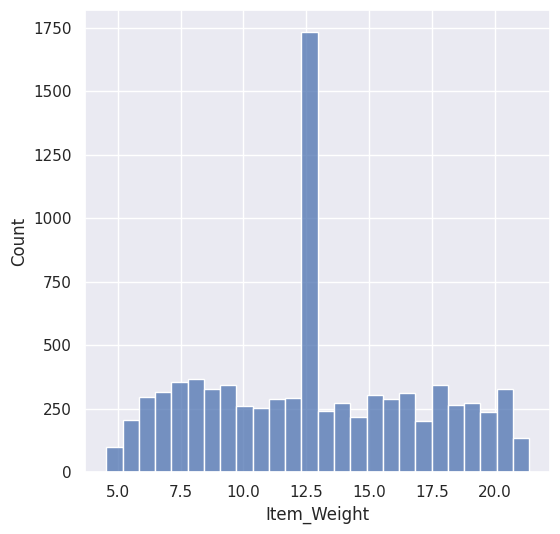

In [23]:
# Distribusi Item_Weight
plt.figure(figsize=(6,6))
sns.histplot(sales_data['Item_Weight'])
plt.show()

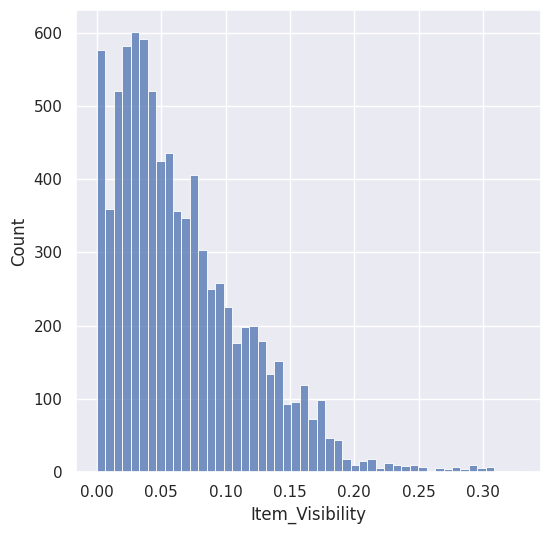

In [24]:
# Distribusi Item Visibility
plt.figure(figsize=(6,6))
sns.histplot(sales_data['Item_Visibility'])
plt.show()

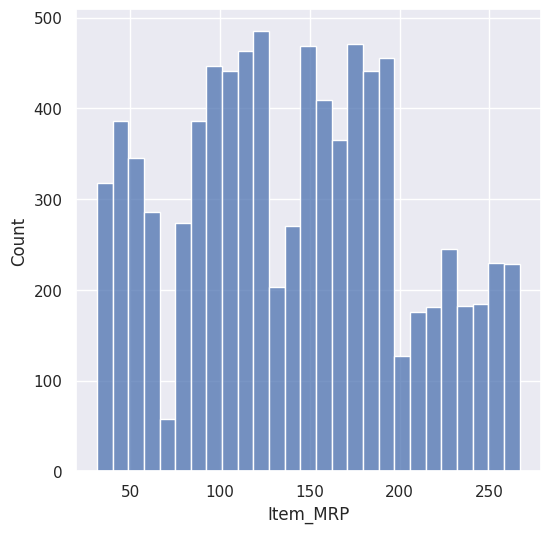

In [25]:
# Distribusi Item MRP
plt.figure(figsize=(6,6))
sns.histplot(sales_data['Item_MRP'])
plt.show()

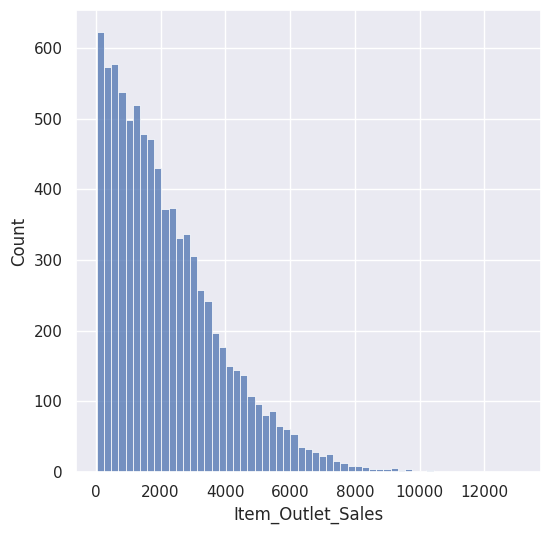

In [26]:
# Dsitribusi Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.histplot(sales_data['Item_Outlet_Sales'])
plt.show()

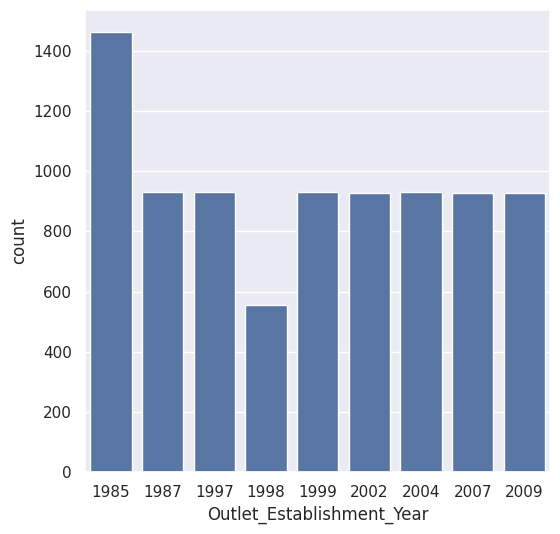

In [28]:
# Kolom Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()

Categorical Features

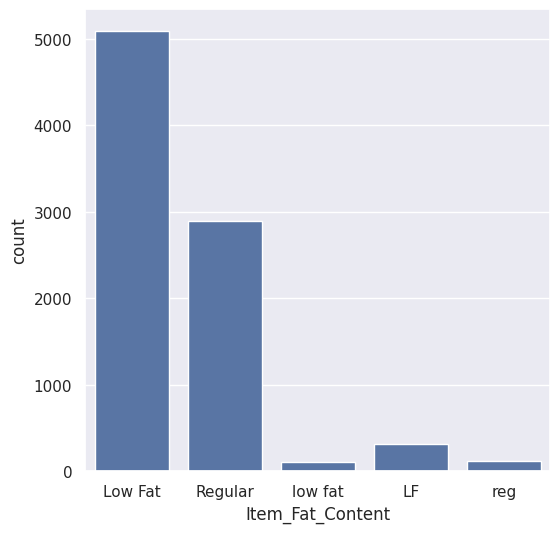

In [29]:
# Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

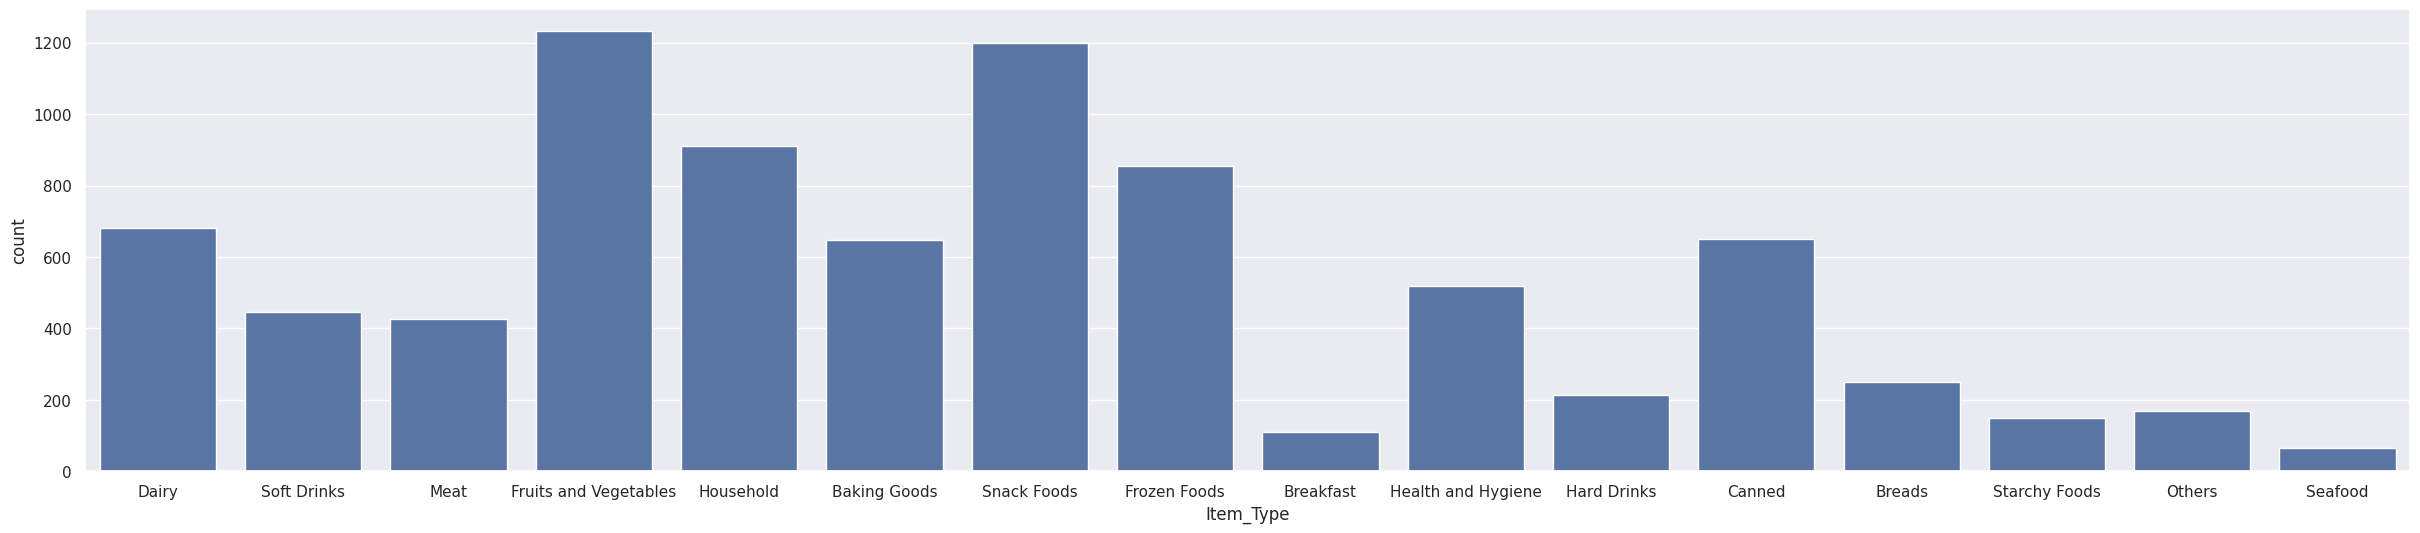

In [30]:
# Item_Type
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

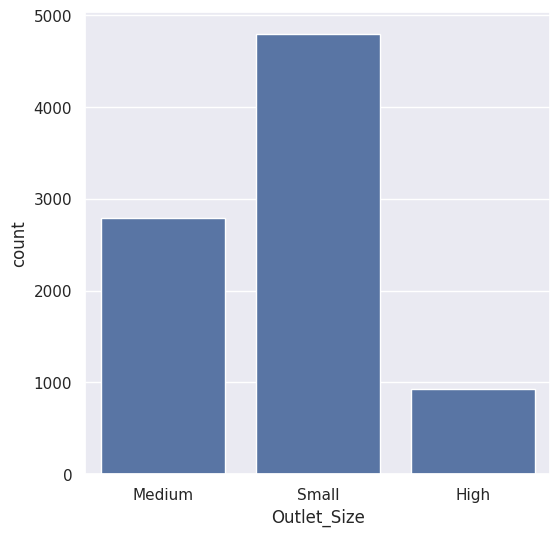

In [31]:
# Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

Data Pre-Processing

In [32]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [34]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [35]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [36]:
encoder = LabelEncoder()

In [37]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [38]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Pemisahan features dan Target

In [39]:
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']

In [40]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [41]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Pemisahan Data Latih dan Data Uji

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Pelatihan

Menggunakan XGBRegressor untuk model prediksi.

In [44]:
regressor = XGBRegressor()

In [45]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Performa Model :**

Evaluasi Model

In [51]:
training_data_prediction = regressor.predict(X_train)

In [52]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [53]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


Menampilkan hasil prediksi

In [46]:
# prediksi pada test data
test_data_prediction = regressor.predict(X_test)

In [47]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': test_data_prediction})

In [48]:
print(results.head())

         Actual    Predicted
1112  1544.6560  2350.160645
1751  6404.9960  1861.643921
7648  1070.6064  1700.955566
7362   369.5190   240.689972
5332   101.2016   274.302002


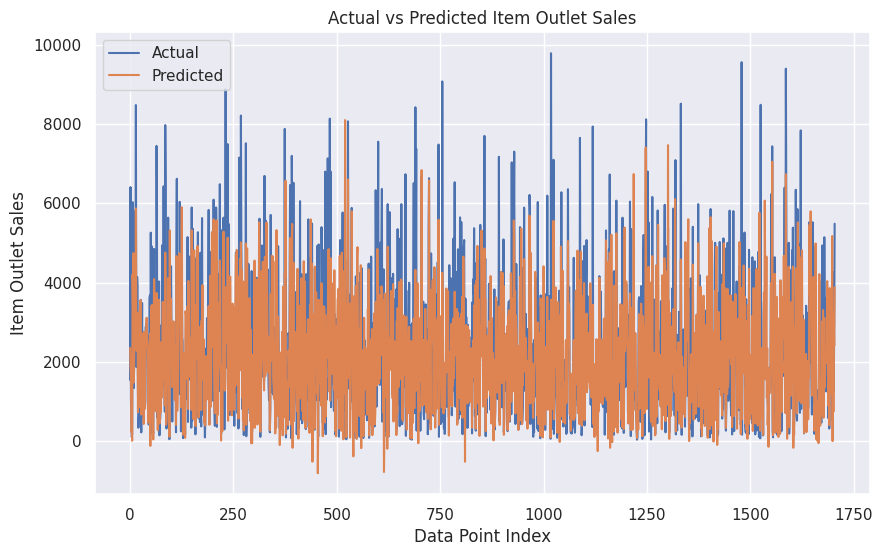

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual')
plt.plot(test_data_prediction, label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Item Outlet Sales')
plt.title('Actual vs Predicted Item Outlet Sales')
plt.legend()
plt.show()

# **Kesimpulan**

Hasil prediksi penjualan menggunakan model machine learning menunjukkan bahwa model dapat mengikuti tren penjualan aktual dengan cukup baik. Grafik perbandingan antara penjualan aktual dan prediksi mengindikasikan bahwa model mampu mengidentifikasi pola umum dari data penjualan historis. Meskipun demikian, terdapat beberapa fluktuasi signifikan antara nilai aktual dan prediksi pada beberapa titik, yang menunjukkan bahwa model perlu ditingkatkan lebih lanjut untuk mencapai akurasi yang lebih tinggi.

Untuk memperbaiki kinerja model, disarankan untuk melakukan preprocessing data yang lebih mendalam, seperti penghilangan outliers dan penambahan fitur baru yang relevan. Selain itu, pemilihan model yang lebih kompleks dan penerapan teknik tuning parameter dapat membantu meningkatkan akurasi prediksi. Evaluasi model dengan metrik R-squared menunjukkan bahwa model sudah berada pada jalur yang tepat, namun masih ada ruang untuk perbaikan agar hasil prediksi dapat lebih mendekati nilai aktual.

Secara keseluruhan, model prediksi yang digunakan dalam penelitian ini telah memberikan gambaran awal yang baik tentang kemampuan machine learning dalam memprediksi penjualan di toko grosir. Langkah selanjutnya adalah mengoptimalkan model dan mengeksplorasi metode lain untuk mencapai hasil yang lebih akurat dan dapat diandalkan.